In [49]:
#importing dependencies and csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

flo_man_nat_df = pd.read_csv('filtered_nyt_Florida_Man_data.csv')

flo_man_nat_df= flo_man_nat_df.dropna()
flo_man_nat_df.count()

Unnamed: 0    85
Title         85
Summary       85
Link          85
Time          85
Section       85
Subsection    85
Category      85
State         85
dtype: int64

In [50]:
arrest = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('arrest')]
assault = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('assault')]
gun = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('gun')]
kill = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('kill')]
murder = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('murder')]
officer= flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('officer')]
police = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('police')]
shot = flo_man_nat_df[flo_man_nat_df['Summary'].str.contains('shot')]

t_arrest = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('arrest')]
t_assault = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('assault')]
t_gun = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('gun')]
t_kill = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('kill')]
t_murder = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('murder')]
t_officer= flo_man_nat_df[flo_man_nat_df['Title'].str.contains('officer')]
t_police = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('police')]
t_shot = flo_man_nat_df[flo_man_nat_df['Title'].str.contains('shot')]


crimes_df = pd.concat([arrest, assault, gun, kill, murder, officer, police, shot, t_arrest, t_assault, t_gun, t_kill, t_murder, t_officer, t_police, t_shot])
crimes_df = crimes_df.drop_duplicates()
crimes_df['Crimes'] = 'Reports Crime'
crimes_df.count()

Unnamed: 0    27
Title         27
Summary       27
Link          27
Time          27
Section       27
Subsection    27
Category      27
State         27
Crimes        27
dtype: int64

In [51]:
#finding complement of crimes_df in flo_man_df

idx_flo = flo_man_nat_df.index
idx_cri = crimes_df.index

idx_law = idx_flo.difference(idx_cri)

law_abiding = flo_man_nat_df.loc[idx_law, :]
law_abiding_df = pd.DataFrame(law_abiding)
law_abiding_df['Crimes'] = 'Does Not Report Crime'

law_abiding_df.count()

Unnamed: 0    58
Title         58
Summary       58
Link          58
Time          58
Section       58
Subsection    58
Category      58
State         58
Crimes        58
dtype: int64

In [52]:
local_report_df = pd.concat([crimes_df, law_abiding_df])

to_plot = local_report_df['Crimes'].tolist()
rc = to_plot.count('Reports Crime')
dnrc = to_plot.count('Does Not Report Crime')
length = len(to_plot)

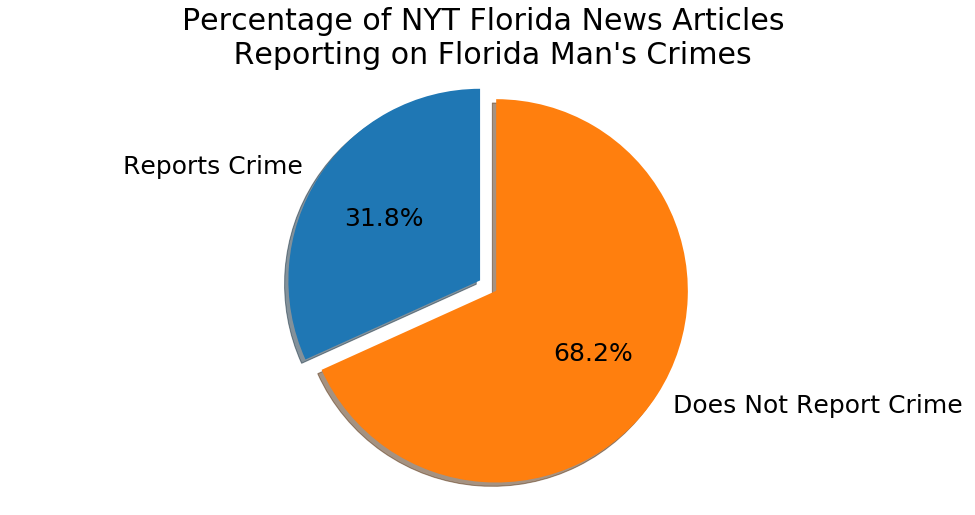

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Reports Crime', 'Does Not Report Crime']
sizes = [(rc/length*100), (dnrc/length*100)]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Percentage of NYT Florida News Articles \n Reporting on Florida Man's Crimes")
plt.rcParams.update({'font.size': 25})
fig1.set_size_inches(16, 8)
fig1.savefig('florida_nat_crimes.png', dpi=100)
plt.tight_layout()
plt.show()